## Simple 2D linear Regression with Gradient Descent

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

%matplotlib notebook
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import warnings
warnings.simplefilter(action="ignore")

In [40]:
X,y = make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

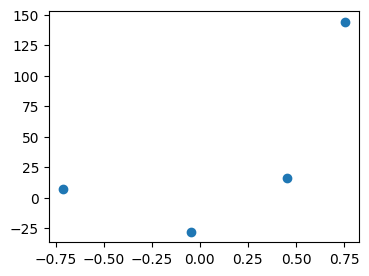

In [41]:
plt.figure(figsize=(4,3))
plt.scatter(X,y)

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X,y)

LinearRegression()

In [90]:
# Using sklearn class from linear_model
print(f"coef_: ",lr.coef_)
print(f"inte_: ",lr.intercept_)


coef_:  [78.35063668]
inte_:  26.15963284313262


### My GdRegressor () class to find b only while m  is considered constant for simplicity

$$
\frac{\partial J}{\partial b} = -2 \sum (y_i - m x_i - b)
$$


In [45]:
class GdRegressor:
    
    def __init__(self, lr = 0.01, epochs= 30):
        self.m = 78.35
        self.b = 0
        self.lr = lr
        self.epochs = epochs

    def fit(self, Xtrain, ytrain):
        for i in range(self.epochs):
            slope_b = -2 * np.sum(ytrain - (self.m * Xtrain) - self.b)     # Xtrain.ravel() can also be used but X is 2D and is very faster with np
            self.b = self.b - (self.lr * slope_b)
        print(f"The value of b with myGdRegressor is same and is: " ,self.b)
          
        
    def predict(self,Xtest):
        return self.m * X + self.b
        

In [46]:
myGdRegressor = GdRegressor()

In [47]:
myGdRegressor.fit(X,y)

The value of b with myGdRegressor is same and is:  26.159457144633905


### To Plot line with b = 0 and b after calling the GdRegressor Class

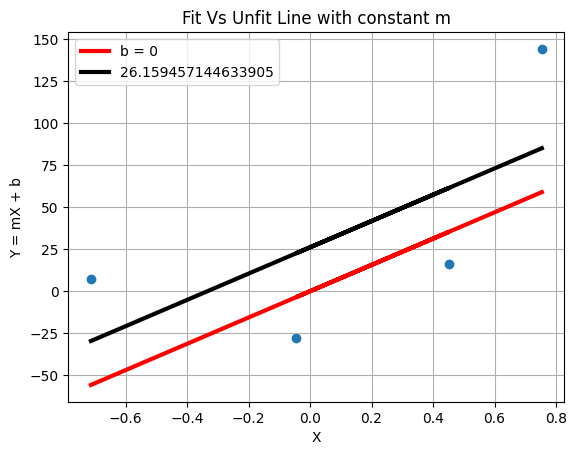

In [48]:
m = 78.35
plt.plot(X,m * X,lw = 3,color = 'r',label = 'b = 0')
plt.plot(X,myGdRegressor.predict(X),lw = 3,color = 'k',label= myGdRegressor.b)
plt.grid()
plt.scatter(X,y)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y = mX + b')
plt.title("Fit Vs Unfit Line with constant m")
plt.show()

## Let's Work With large data for both m and b

In [49]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [50]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state = 42)

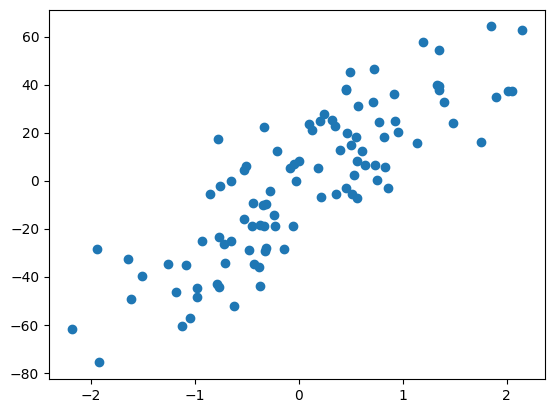

In [51]:
plt.scatter(X,y)
plt.show()

In [52]:
# This is from Sklearn
lrs = LinearRegression()
lrs.fit(Xtrain,ytrain)
print(lrs.coef_)
print(lrs.intercept_)

[28.16404017]
-2.7130725669241036


In [53]:
prediction = lrs.predict(Xtest)

In [91]:
r2Score = r2_score(ytest,prediction)
r2Score

0.6186926408914155

### Create Class where loss functin depends on  both m and b 

$$
\frac{\partial J}{\partial b} = -2 \sum (y_i - m x_i - b)
$$


$$
\frac{\partial J}{\partial m} = -2 \sum (y_i - m x_i - b) \cdot x_i
$$


In [55]:
# We will be using the above two formulas for finding the slopes. The 

In [77]:
class AdvanceGdRegressor:
    def __init__(self, lr=0.001, epochs=30):  # No need for such large number of epochs. but this is increase onlu for cost function plotting
        self.m = -10
        self.b = 10             # This is the random initialiization 
        self.lr = lr
        self.epochs = epochs

    def fit(self, Xtrain, ytrain):
        all_b = []
        all_m = []
        all_cost = []

        for i in range(self.epochs):
            slope_b = 0
            slope_m = 0
            cost = 0

            for j in range(Xtrain.shape[0]):
                slope_b += -2 * (ytrain[j] - (self.m * Xtrain.ravel()[j]) - self.b)
                slope_m += -2 * (ytrain[j] - (self.m * Xtrain.ravel()[j]) - self.b) * Xtrain.ravel()[j]
                cost += (ytrain[j] - self.m * Xtrain.ravel()[j] - self.b) ** 2

            # Update parameters
            self.b = self.b - (self.lr * slope_b)
            self.m = self.m - (self.lr * slope_m)

            # Track the progress
            all_b.append(self.b)
            all_m.append(self.m)
            all_cost.append(cost)
            
        print((float(self.b),float(self.m)))
        return (all_b, all_m, all_cost)

    def predict(self, Xtest):
        return self.m * Xtest + self.b


In [78]:
epochs = 60
advGdRegressor = AdvanceGdRegressor(lr=0.001,epochs=epochs)

In [79]:
all_b,all_m,all_cost = advGdRegressor.fit(Xtrain,ytrain)


(-2.7120135765637277, 28.159191914748057)


### Let's Plot with b = 10 and m  = -10

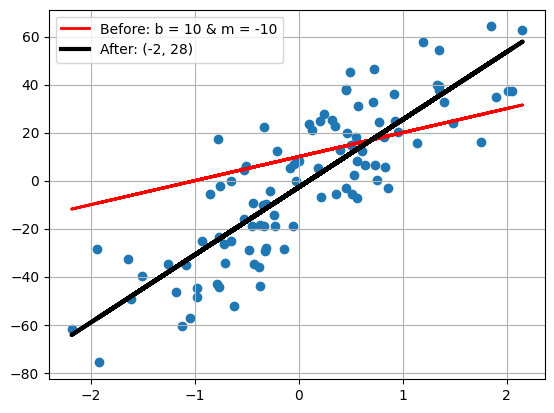

In [80]:
plt.plot(X,10 * X + 10,lw = 2,color = 'r',label = 'Before: b = 10 & m = -10')
plt.plot(X,advGdRegressor.predict(X),lw = 3,color = 'k',label ="After: " + str( (int(advGdRegressor.b),int(advGdRegressor.m))))
plt.grid()
plt.legend()
plt.scatter(X,y)
plt.show()

### Plotting b Vs Loss Function

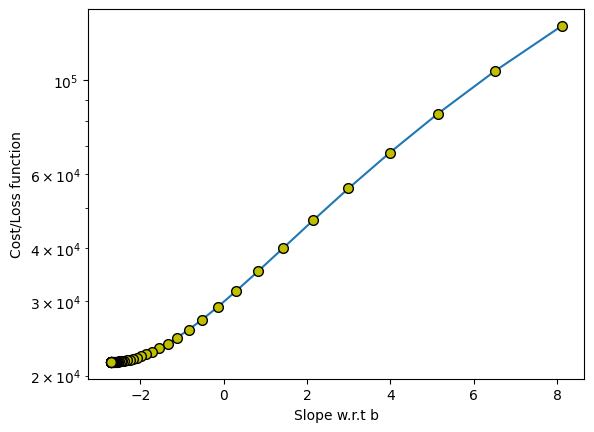

In [81]:
plt.plot(all_b,all_cost,marker = 'o',markersize = 7,mfc = 'y',markeredgecolor = 'k')
plt.yscale('log')
plt.xlabel('Slope w.r.t b')
plt.ylabel('Cost/Loss function')
plt.show()

### Plotting m Vs Loss Function


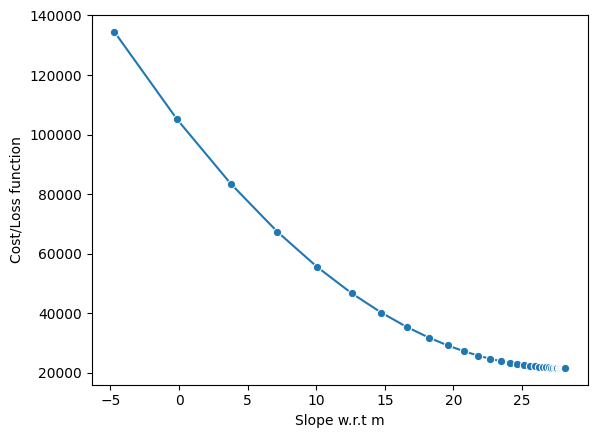

In [82]:
sns.lineplot(x = all_m, y = all_cost,marker = 'o')
plt.xlabel('Slope w.r.t m')
plt.ylabel('Cost/Loss function')
plt.show()

### Epochs Vs b m

In [83]:
all_epochs = list(range(epochs))

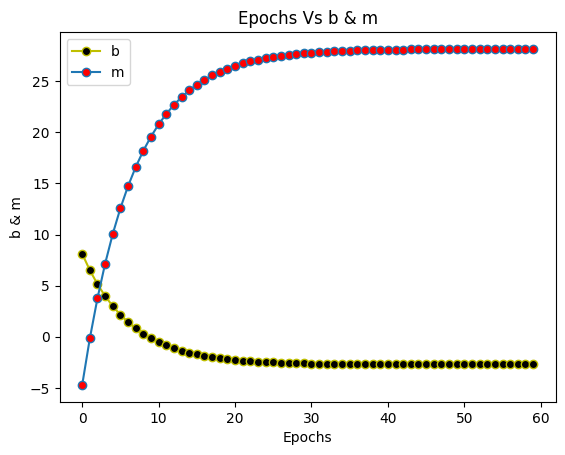

In [84]:
plt.plot(all_epochs,all_b,label = 'b',marker = 'o',color = 'y',mfc = 'k')
plt.plot(all_epochs,all_m,label = 'm',marker = 'o',mfc = 'r')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('b & m')
plt.title("Epochs Vs b & m")
plt.show()

In [85]:
myPrediction = advGdRegressor.predict(Xtest)

In [92]:
myr2Score = r2_score(ytest,myPrediction)
myr2Score

0.6187119345635536

## Rough Work of GD

In [ ]:
myGdRegressor = GdRegressor()
myGdRegressor.fit(X,y)

In [ ]:
bold = 0
epox = 5
for i in range(epox):
   
    sl = -2 * np.sum(y- m * X.ravel() - bold)
    
    bnew = bold - 0.01 * sl
    bold = bnew
    print(bnew)

In [ ]:
b = 0
epox = 5
m = 78.35
all_b = []
all_cost = []
for i in range(epox):
    slope = -2 * np.sum(y - m * X.ravel()- b)
    ss = 0.01 * slope 
    b = b - ss
    
    print(b)

    

### This below Method is the Longest way to get the same behaviour of numpy  broadCasting for 1 case 4 samples

In [ ]:
# if we look at the shape of X which is 2D. 
print(X.shape)     #  and the shape of y is 1D  
print(y.shape)     # 1D
# Now the broadcasting phenomena occurs when we do y - X or y - m * X. where m doesn't affect the broadcasting as it is a constant shown in below cell

In [ ]:
# Broadcasting 
sub = y - X
print(sub.shape)


In [ ]:
m = 78.35
bold = 0
for i in range(epox):
    lst = []
    for i in range(X.shape[0]):
        ns = 0
        for j in range(X.shape[0]):
            ns += y[i] - (m*X[j]) - bold
            
        lst.append(ns)
    nslope = 0
    for d in lst:
        nslope += -2 *  d[0]
    
    bnew = bold - 0.01 * nslope
    bold = bnew
    print(bnew)